## Übung 7

In [1]:
import matplotlib
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import networkx as nx


def print_divider(separator='-', length=80):
    print(''.join([separator for _ in range(length)]))
    print()
    
def print_heading(msg='', separator='-'):
    print(' ')
    print(msg)
    print_divider(separator=separator, length=len(msg))
    

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12., 8.]

### Aufbau der Basisdaten

#### Laden der Matlab Daten

In [2]:
# https://docs.scipy.org/doc/scipy/reference/tutorial/io.html
mat = scipy.io.loadmat('matrix.mat')

print('loadmat:\n%s' % str(mat))

# 'A': <4039x4039 sparse matrix of type '<class 'numpy.float64'>'
# with 176468 stored elements in Compressed Sparse Column format>
sparse_matrix = mat['A']

print('\nShape:\n%s' % str(sparse_matrix.shape))
print('\nType:\n%s' % type(sparse_matrix))
print('\nSparse Matrix:\n%s' % sparse_matrix)
print('\nCoordinate Matrix:\n%s' % sparse_matrix.tocoo())

loadmat:
{'__version__': '1.0', 'A': <4039x4039 sparse matrix of type '<class 'numpy.float64'>'
	with 176468 stored elements in Compressed Sparse Column format>, '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jan 11 10:56:22 2016', '__globals__': []}

Shape:
(4039, 4039)

Type:
<class 'scipy.sparse.csc.csc_matrix'>

Sparse Matrix:
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  (25, 0)	1.0
  :	:
  (4027, 4031)	1.0
  (4038, 4031)	1.0
  (3980, 4032)	1.0
  (4027, 4032)	1.0
  (3980, 4033)	1.0
  (3986, 4033)	1.0
  (4000, 4033)	1.0
  (3980, 4034)	1.0
  (4023, 4034)	1.0
  (3980, 4035)	1.0
  (3980, 4036)	1.0
  (3999, 4036)	1.0
  (3980, 4037)	1.0
  (3982, 4037)	1.0
  (4014, 4037)	1.0
  (4020, 40

#### Darstellung in einer Adjazenzmatrix

*Zur Erinnerung*, innerhalb einer Adjazenzmatrix wird für jede Kante zwischen zwei Knoten eine 1 eingetragen, ansonsten eine 0. 

In der folgenden Grafik sind einige große Rechtecke zu sehen. D.h. dass es in der Matrix einige Bereiche gibt in denen die Knoten stark untereinander verbunden sind. In den jeweiligen Ecken befinden sich wenige Knoten, die eine "Verbindung" zum nächsten Bereich besitzen. Das bedeutet, dass es in dem zu Grunde liegenden Graph einige wenige Knoten gibt, die als Verbindungsstück zu einem anderen Bereich fungieren. Tendenziell wird viel Datenverkehr über diese Knoten laufen, wenn Knoten aus unterschiedlichen Bereichen miteinander kommunizieren wollen. Diese Knoten sind ein Nadelöhr im gesamten Graph. Wenn Sie wegfallen entstehen einzelne Inseln die untereinander nicht kommunizieren können. 

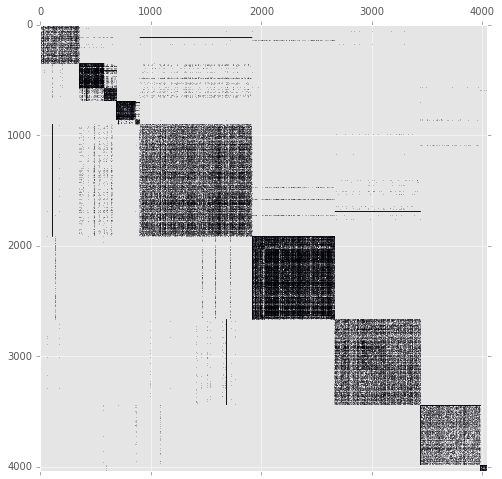

In [3]:
# http://stackoverflow.com/questions/18651869/scipy-equivalent-for-matlab-spy
pl.spy(sparse_matrix, precision=0.01, markersize=.1)
pl.show()

In [4]:
# https://jakevdp.github.io/blog/2012/10/14/scipy-sparse-graph-module-word-ladders/
# from scipy.sparse import csgraph

# bft = csgraph.breadth_first_tree(sparse_matrix, 0, directed=False)
# print(bft)

graph = nx.from_scipy_sparse_matrix(sparse_matrix, create_using=nx.MultiGraph())

#### Darstellung als Graph

Im folgenden Graph sind die einzelnen Inseln ganz gut zu erkennen.

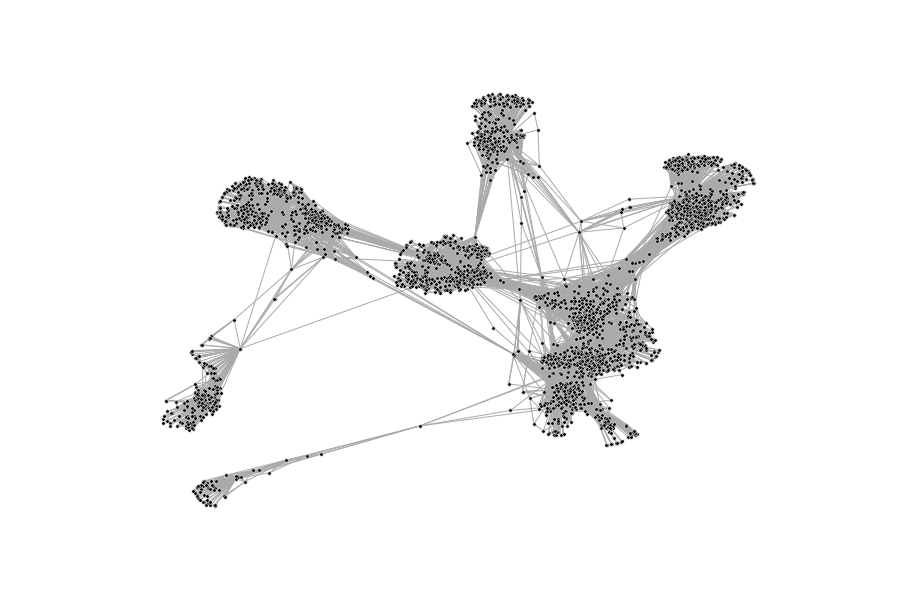

In [5]:
nx.draw(graph, node_shape='o', node_size=12, node_color='#000000', edge_color='#aaaaaa')
plt.show()

#### ``nx.dfs_successors``

In den Aufgaben wird als Wurzel immer die ``42`` verwendet. Über die Funktion ``nx.dfs_successors`` wird aus dem ursprünglichen ungereichteten ``nx.MultiGraph`` ein gerichteter ``nx.DiGraph`` erzeugt. Die der Wurzel folgenden Knoten usw. enthalten deren Nachfolger nach ``depth first search``-Mechanik. Die Datenstruktur ist ein ``dict`` mit den Ids der Knoten und einer Liste der Nachfolger.

In [6]:
root_id = 42
print_heading('Wurzel %d' % root_id, separator='=')
print('Nachbarn: %s\n' % nx.neighbors(graph, root_id))
print_heading('``nx.dfs_successors`` der Wurzel')
node = nx.dfs_successors(graph, root_id)
for _id in sorted(node.keys())[:10]:
    print('        id: %d' % _id)
    print('successors: %s' % node[_id])

 
Wurzel 42

Nachbarn: [0, 33]

 
``nx.dfs_successors`` der Wurzel
--------------------------------

        id: 0
successors: [1, 11, 12, 15, 18, 33, 37, 43, 74, 90, 114, 209, 210, 215, 233, 244, 287, 292, 335]
        id: 1
successors: [194]
        id: 2
successors: [226]
        id: 3
successors: [228]
        id: 4
successors: [181]
        id: 5
successors: [316, 169]
        id: 6
successors: [219, 95]
        id: 7
successors: [291]
        id: 8
successors: [193]
        id: 9
successors: [258]


#### ``nx.dfs_tree``

Im Gegensatz zu ``nx.dfs_successors`` liefert diese Methode kein ``dict`` sondern den eigentlichen Graphen. Wichtige Methoden zu Analyse sind an dieser Stelle:

- ``G.nodes()``
- ``G.edges()``

``nodes`` liefert alle Knoten des Graphen. ``edges`` liefert alle Kanten. Natürlich kann der Fall eintreten, dass ausgehend von einem Knoten keine weitere Verbindung zu anderen Knoten existiert, da es sich um einen gerichteten Graphen handelt. Sollte also eine Analyse der Nachbarn erfolgen (``nx.neighbors(graph, node``) muss diese Analyse auf dem ursprünglich geladenen Graphen erfolgen.

In [7]:
dfs_tree = nx.dfs_tree(graph, 42)
print_heading('Knoten des Baums der Tiefensuche')
print(dfs_tree.nodes()[:10])

 
Knoten des Baums der Tiefensuche
--------------------------------

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
root_id = 42
dfs_tree = nx.dfs_tree(graph, root_id)
edges = dfs_tree.edges()[:10]

print_heading('Kanten des Baums der Tiefensuche')
for edge in edges:
    print(edge)

 
Kanten des Baums der Tiefensuche
--------------------------------

(0, 1)
(0, 11)
(0, 292)
(0, 37)
(0, 33)
(0, 210)
(0, 233)
(0, 74)
(0, 43)
(0, 12)


#### Zähler der Nachbarn

Die folgende Methode dient zum Zählen der Nachbarn, wenn der Graph rekursiv durchgegangen wird.

In [9]:
neighbor_count = 0
def neighbor_counter(node, debug=False):
    global neighbor_count
    if debug:
        print('node {:5d}, neighbors: {:5d}'.format(node, len(nx.neighbors(graph, node))))
    neighbor_count += len(nx.neighbors(graph, node))

#### Limit der Rekursionstiefe

Zum aktuellen Zeitpunkt ist der Standardwert der Rekursionstiefe auf 1000 begrenzt. In der folgenden Beispielen wird eine höhere Tiefe erforderlich.

In [10]:
import sys
sys.setrecursionlimit(2000)

### Aufgabe 7.1 Crawlen unstrukturierter Netze

#### 7.1.1 Vergleich der mittleren Knotengrade

##### Implementierung der Algorithmen

An dieser Stelle sind zunächst Tiefen- und Breitensuche implementiert und erklärt. Der reine Vergleich folgt [später im Dokument](#Vergleich-der-Knotengrade-der-einzelnen-Algorithmen).

In [11]:
from datetime import datetime

root_id = 42
max_visits = (100, 200, 400, 800, 1600)

def timed(func):
    start = datetime.now()
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        end = datetime.now()
        print('  Dauer: %s' % str(end - start), end='\n\n')
    return wrapper

In [12]:
def crawl_dfs(edges: list, node: int, max_visits: int, S: set, callback):
    """Crawlt einen Graph anhand seiner Kanten mit Hilfe von
    depth first search in rekursiver Variante.
    
    :param edges: Liste mit 2-Tupeln, die alle Kanten des Graphen beinhalten
    :param node: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    :param S: Menge an Knoten, die bereits besucht wurden
    :param callback: Funktion mit einem Parameter, der bei Aufruf
        den besuchten Knoten enthält
    """
    S.add(node)
    callback(node)
    neighbors = [e[1] for e in edges if e[0] == node]
    for neighbor in neighbors:
        if neighbor not in S and len(S) < max_visits:
            crawl_dfs(edges, neighbor, max_visits, S, callback)


print_heading('Crawl des Graphs über Tiefensuche')

g = nx.dfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_dfs(max_visits):
    global neighbor_count
    neighbor_count = 0
    crawl_dfs(edges, root_id, max_visits=count, S=set(), callback=neighbor_counter)
    print('Knotengrad {:.4f} bei {:5d} besuchten Knoten'.format((neighbor_count / count), count))
    
for count in max_visits:
    timed_crawl_dfs(count)

 
Crawl des Graphs über Tiefensuche
---------------------------------

Knotengrad 83.6400 bei   100 besuchten Knoten
  Dauer: 0:00:00.416127

Knotengrad 97.7700 bei   200 besuchten Knoten
  Dauer: 0:00:01.248958

Knotengrad 58.0325 bei   400 besuchten Knoten
  Dauer: 0:00:02.917882

Knotengrad 51.1525 bei   800 besuchten Knoten
  Dauer: 0:00:06.240017

Knotengrad 48.5519 bei  1600 besuchten Knoten
  Dauer: 0:00:12.904321



In [13]:
def crawl_dfs_iter(edges, root, max_visits=10):
    """Generator der einen Graph anhand seiner Kanten mit Hilfe von
    depth first search in iterativer Variante crawlt. Die Id des
    besuchten Knoten wird dabei geliefert.
    
    :param edges: Liste mit 2-Tupeln, die alle Kanten des Graphen beinhalten
    :param root: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    """
    visited = 0
    S = set()
    Q = [] 
    Q.append(root)
    while Q and visited < max_visits:
        
        node = Q.pop()
        yield node
        visited += 1
        if node not in S and visited < max_visits:
            S.add(node)
            neighbors = [e[1] for e in edges if e[0] == node]
            
            # umdrehen der nachbarn, damit diese in der richtigen
            # reihenfolge durch pop wieder entnommen werden
            neighbors.reverse()
            for neighbor in neighbors:
                Q.append(neighbor)

print_heading('Crawl des Graphs über iterative Tiefensuche')

g = nx.dfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_dfs_iter(max_visits):
    neighbor_count = 0
    for node in crawl_dfs_iter(edges, root_id, max_visits=count):
        # print('node {:5d}, neighbors: {:5d}'.format(node, len(nx.neighbors(graph, node))))
        neighbor_count += len(nx.neighbors(graph, node))
        
    msg = 'Knotengrad {:.4f} bei {:5d} besuchten Knoten'
    print(msg.format((neighbor_count / count), count))

for count in max_visits:
    timed_crawl_dfs_iter(count)

 
Crawl des Graphs über iterative Tiefensuche
-------------------------------------------

Knotengrad 83.6400 bei   100 besuchten Knoten
  Dauer: 0:00:00.425382

Knotengrad 97.7700 bei   200 besuchten Knoten
  Dauer: 0:00:01.241923

Knotengrad 58.0325 bei   400 besuchten Knoten
  Dauer: 0:00:02.885863

Knotengrad 51.1525 bei   800 besuchten Knoten
  Dauer: 0:00:06.134253

Knotengrad 48.5519 bei  1600 besuchten Knoten
  Dauer: 0:00:12.662943



In [14]:
def crawl_bfs(edges, Q=[], S=set(), max_visits=10, callback=lambda x: x):
    next_q = []
    while len(S) < max_visits:
        for node in Q:
            if node not in S and len(S) < max_visits:
                S.add(node)
                callback(node)
                neighbors = [n[1] for n in edges if n[0] == node and n[1] not in S]
                next_q += neighbors
        crawl_bfs(edges, next_q, S, max_visits, callback)
        
print_heading('Crawl des Graphs über Breitensuche')

g = nx.bfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_bfs(max_visits):
    global neighbor_count
    neighbor_count = 0

    crawl_bfs(edges, [root_id], max_visits=count, S=set(), callback=neighbor_counter)
    print('Knotengrad {:10,.4f} bei {:5d} besuchten Knoten'.format((neighbor_count / count), count))

for count in max_visits:
    timed_crawl_bfs(count)

 
Crawl des Graphs über Breitensuche
----------------------------------

Knotengrad    18.4600 bei   100 besuchten Knoten
  Dauer: 0:00:00.124682

Knotengrad    22.6450 bei   200 besuchten Knoten
  Dauer: 0:00:00.362267

Knotengrad    28.8450 bei   400 besuchten Knoten
  Dauer: 0:00:00.834418

Knotengrad    38.7563 bei   800 besuchten Knoten
  Dauer: 0:00:01.753877

Knotengrad    48.2881 bei  1600 besuchten Knoten
  Dauer: 0:00:03.601548



In [15]:
def crawl_bfs_iter(edges, root, max_visits=10):
    visited = 0
    # Verwendung von Q als Queue (FIFO)
    Q = []
    S = set()
    
    Q.append(root)
    S.add(root)
    
    while Q and visited < max_visits:
        node = Q.pop(0)
        yield node
        visited += 1
        neighbors = [e[1] for e in edges if e[0] == node]
        for neighbor in neighbors:
            if neighbor not in S:
                S.add(neighbor)
                Q.append(neighbor)
                
print_heading('Crawl des Graphs über iterative Breitensuche')

g = nx.bfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_bfs_iter(max_visits):
    neighbor_count = 0

    for node in crawl_bfs_iter(edges, root_id, max_visits=count):
        # print('node {:5d}, neighbors: {:5d}'.format(node, len(nx.neighbors(graph, node))))
        neighbor_count += len(nx.neighbors(graph, node))
        
    print('Knotengrad {:10,.4f} bei {:5d} besuchten Knoten'.format((neighbor_count / count), count))

for count in max_visits:
    timed_crawl_bfs_iter(count)

 
Crawl des Graphs über iterative Breitensuche
--------------------------------------------

Knotengrad    18.4600 bei   100 besuchten Knoten
  Dauer: 0:00:00.125852

Knotengrad    22.6450 bei   200 besuchten Knoten
  Dauer: 0:00:00.382958

Knotengrad    28.8450 bei   400 besuchten Knoten
  Dauer: 0:00:00.846396

Knotengrad    38.7563 bei   800 besuchten Knoten
  Dauer: 0:00:01.754532

Knotengrad    48.2881 bei  1600 besuchten Knoten
  Dauer: 0:00:03.553893



Man kann an den einzeln ermittelten Knotengraden sehen, dass selbst bei einer hohen Anzahl an Knoten (>= 800) ein ungenaues Vergleichsergebnis zum tatsächlichen mittleren Knotengrad ergibt. Eine Annäherung ist trotzdem zu erkennen.

Neben der Ermittlung der Knotengrade kann man sehen, dass ein Crawling mittels *BFS* schneller ist als die *DFS* Umsetzung. Bei einer sehr hohen Anzahl an durchsuchten Knoten empfiehlt sich die iterative Implementierung, da ansonsten wieder Heap-Probleme bei einer Rekursion auftreten.

Der tatsächliche mittlere Knotengrad berechnet sich auch der Summe aller Nachbarn aller Knoten des ungerichteten Graphs $g$ durch die Anzahl der Knoten.

$\dfrac{\sum_{i=0}^{n} neighbors(g[i])}{n}$

In [16]:
sum([len(nx.neighbors(graph, n)) for n in graph.nodes()]) / len(graph.nodes())

43.69101262688784

Plot der (C)CDF

In [17]:
def ecdf(values):
    """Liefert eine Liste an 2-Tupeln, die die x- und y-Werte von
    Punkten innerhalb einer empirischen Distributionsfunktion darstellen.
    
    Beispiel:
    Gegeben sei die Menge (2, 3, 3, 5, 8, 9, 9, 10).
    
    Geliefert wird 
    [(2, 0.12), (3, 0.38), (5, 0.5), (8, 0.62), (9, 0.88), (10, 1.0)]
    
    12% aller Werte sind <= 2
    38% aller Werte sind <= 3
    50% aller Werte sind <= 5
    ...
    """
    # 1. sortieren der werte
    values = sorted(values)

    # 2. reduzieren der werte auf eindeutigkeit
    unique_values = sorted(list(set(values)))

    # 3. ermittlung wie viele werte <= x sind fuer jede eindeutige zeit
    cumsum_values = []
    for u in unique_values:
        cumsum_values.append((u, len([1 for _ in values if _ <= u])))

    # 4. ermittlung der prozentualen anteile wie viele werte <= x sind
    y = np.round([c / len(values) for t, c in cumsum_values], decimals=2)
        
    return list(zip(unique_values, y))
    
def plot_ecdf(points, complementary=False, plotter=plt, 
              point_color='#e53935', line_color='#1e88e5', 
              title=None, xlabel=None, label=''):
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    
    # das komplement einer cdf ist CCDF(x) = 1 - CDF(x)
    if complementary:
        y = 1 - y # numpy array
    
    # plot mit spezifischer punktefarbe ansonsten wird die farbe von pyplot gewaehlt
    if point_color:
        plotter.plot(x, y, color=point_color, linestyle=' ', marker='.', label=label)
    else:
        plotter.plot(x, y, linestyle=' ', marker='.', label=label)
    
    # entweder ist hier pyplot oder eine achse gegeben
    if plotter == plt:
        plotter.title(title)
        plotter.xlabel(xlabel)
    else:
        plotter.set_title(title)
        plotter.set_xlabel(xlabel)
    
    # rand hinzufuegen
    x_min, x_max, y_min, y_max = plotter.axis()
    plotter.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

    # von x bis x + 1 wird ein einzelner strich geplottet
    if line_color:
        for i in range(len(x)):
            x_0 = x[i]
            x_1 = x[i + 1] if i < len(x) - 1 else x[i] + 1
            plotter.plot([x_0, x_1], [y[i], y[i]], color=line_color, linestyle='-', label=label)

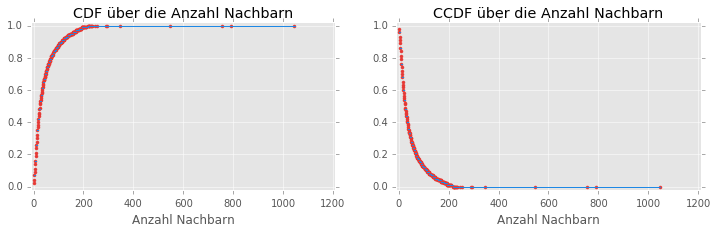

In [18]:
# enthaelt das anzahl nachbarn jedes knoten des ungerichteten graphen
neighbor_count = [len(nx.neighbors(graph, n)) for n in graph.nodes()]

f, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))
ax1, ax2 = axes.ravel()

plot_ecdf(ecdf(neighbor_count), 
          plotter=ax1, 
          title='CDF über die Anzahl Nachbarn', 
          xlabel='Anzahl Nachbarn')
plot_ecdf(ecdf(neighbor_count), 
          plotter=ax2, 
          title='CCDF über die Anzahl Nachbarn', 
          xlabel='Anzahl Nachbarn', 
          complementary=True)

plt.show()

Man kann im obigen Beispiel sehen, dass es nur wenige Knoten gibt, die mehr als ca. 250 Nachbarn besitzen. Daher ist die Grenze von 100% schnell erreicht und verfälscht den Bereich 0 < x < 250. Dieser soll näher betrachtet werden.

In [19]:
print_heading('Höchste Anzahlen an Nachbarn')
print(sorted(neighbor_count)[-10:], end='\n\n')

border = 250
print_heading('Begrenzung zwischen %d' % border)
print('Knoten mit weniger als %d Nachbarn: %d' % (border, len([n for n in neighbor_count if n < border])))
print('Knoten mit mehr als %d Nachbarn: %d' % (border, len([n for n in neighbor_count if n >= border])))

 
Höchste Anzahlen an Nachbarn
----------------------------

[235, 245, 254, 291, 294, 347, 547, 755, 792, 1045]

 
Begrenzung zwischen 250
-----------------------

Knoten mit weniger als 250 Nachbarn: 4031
Knoten mit mehr als 250 Nachbarn: 8


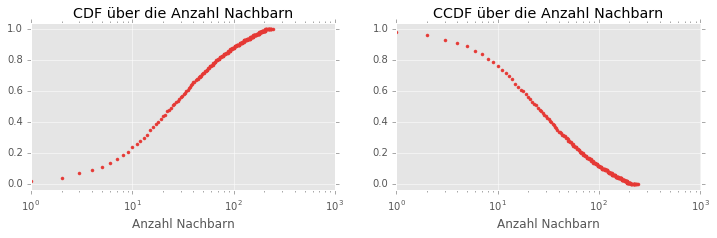

In [20]:
# enthaelt das anzahl nachbarn jedes knoten des ungerichteten graphen
# bis zu einer maximalen anzahl von ``border``
clipped_neighbor_count = [n for n in neighbor_count if n < border]

f, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))
ax1, ax2 = axes.ravel()

def plot_log_cdf(values, ax, title, xlabel, complementary=False):
    """Plottet die gegebenen Werte als CDF auf einer logarithmischen
    x-Achse."""
    points = ecdf(values)

    x_min, x_max, y_min, y_max = ax.axis()
    ax.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xscale('log')
    ax.set_xlim(1e0, 1e3)

    plot_ecdf(points, plotter=ax, line_color=None, complementary=complementary, title=title, xlabel=xlabel)

# CDF der Nachbarn
plot_log_cdf(clipped_neighbor_count, 
             ax1, 
             'CDF über die Anzahl Nachbarn', 
             'Anzahl Nachbarn')

# CCDF der Nachbarn
plot_log_cdf(clipped_neighbor_count, 
             ax2, 
             'CCDF über die Anzahl Nachbarn', 
             'Anzahl Nachbarn', 
             complementary=True)

plt.show()

Hier kann man sehen, dass noch rund 80% aller Knoten weniger als 70 Nachbarn besitzen. Das plotten in einem doppelt logarithmischen Maßstab macht an dieser Stelle keinen Sinn.

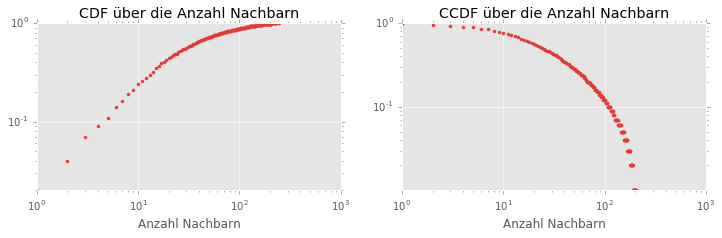

In [21]:
def plot_log_log_cdf(values, ax, title, xlabel, complementary=False):
    
    plot_log_cdf(values, ax, title, xlabel, complementary=complementary)
    ax.set_yscale('log')
    ax.set_ylim(0, 1e0)

f, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))
ax1, ax2 = axes.ravel()

# CDF der Nachbarn
plot_log_log_cdf(clipped_neighbor_count, 
                 ax1, 
                 'CDF über die Anzahl Nachbarn', 
                 'Anzahl Nachbarn')

# CCDF der Nachbarn
plot_log_log_cdf(clipped_neighbor_count, 
                 ax2, 
                 'CCDF über die Anzahl Nachbarn', 
                 'Anzahl Nachbarn', 
                 complementary=True)

plt.show()

Der folgende Code ist definitiv verbesserungswürdig. Es sollen die einzelnen Anzahlen an Nachbarn, über Breiten- und Tiefensuche mit einer maximalen Anzahl von 800 und 1600 und des gesamte Graphs ermittelt werden. Danach erfolgt eine Darstellung der CDFs nebeneinander.

##### Vergleich der Knotengrade der einzelnen Algorithmen

crawle DFS mit   800 besuchen  ..fertig
crawle BFS mit   800 besuchen  ..fertig
crawle DFS mit  1600 besuchen  ..fertig
crawle BFS mit  1600 besuchen  ..fertig
crawle den gesamten graph  ..fertig


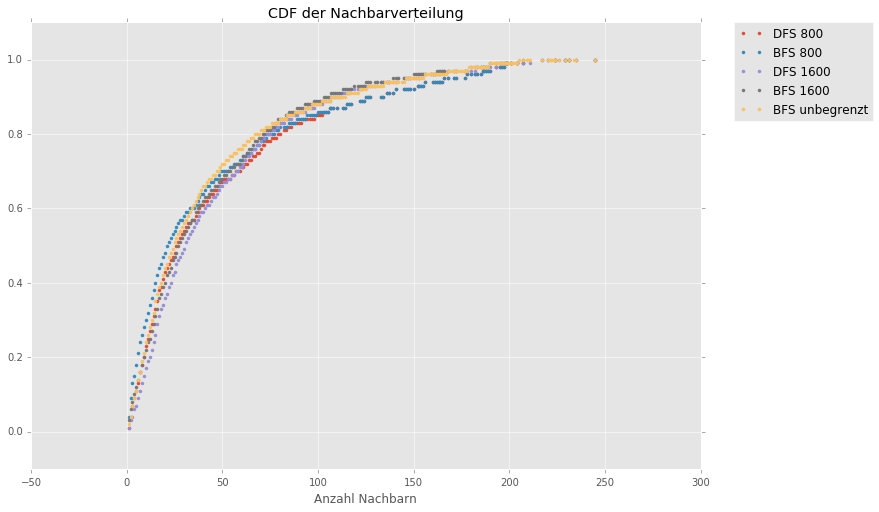

In [22]:
def plot_multi_ecdf(values, legend, title='', xlabel=''):
    """Plottet alle in ``values`` gegebenen Arrays in ein CDF-Diagram.
    Es muss eine Legende gegeben sein, die alle Label-Elemente beinhaltet, die
    fuer ein einzelnes Array gelten.
    """
    for i in range(len(values)):
        arr = values[i]
        points = ecdf(arr)
        plot_ecdf(points, label=legend[i], point_color=None, line_color=None)
        
    plt.title(title)
    plt.xlabel(xlabel)

# alle daten, die fuer die berechnung der einzelnen
# cdfs benoetigt werden
data = {
    'root_id': 42,
    'counts': (800, 1600),
    'crawler': {
        'BFS': {
            'func': crawl_bfs_iter
        },
        'DFS': {
            'func': crawl_dfs_iter
        }
    }
}

# ermittlung beider baeume
dfs_tree = nx.dfs_tree(graph, data['root_id'])
bfs_tree = nx.dfs_tree(graph, data['root_id'])

# die baeume werden ueber ihre kanten geprueft
data['crawler']['BFS']['edges'] = bfs_tree.edges()
data['crawler']['DFS']['edges'] = dfs_tree.edges()

# enthaelt alle nachbarwerte mit einem label, das in der
# legende ausgegeben wird, Bsp.: 'BFS 800'
neighbors = []

# fuer jede anzahl
for count in data['counts']:
    
    # und jeden algorithmus
    for _id in data['crawler'].keys():
        crawler = data['crawler'][_id]
        crawler[str(count)] = []
        
        # markiere den beginn des crawlings
        print('crawle {:s} mit {:5d} besuchen'.format(_id, count), end=' ')
        
        # equivalent zu z.B. 
        # for node in crawl_bfs_iter(bfs_tree.edges(), 42, max_visits=800):
        #     crawler['800'].append(len(nx.neighbors(graph, node)))
        # len(nx.neighbors(graph, node)) = Anzahl Nachbarn eines Knoten
        # Hier werden die Nachbarn eines Knotens des ungerichteten Graphen gezaehlt!
        for node in crawler['func'](crawler['edges'], data['root_id'], max_visits=count):
            crawler[str(count)].append(len(nx.neighbors(graph, node)))
        print(' ..fertig')  
        
        # hinzufuegen der anzahlen an nachbarn mit entsprechendem label
        # hier wird die grenze wieder verwendet
        neighbors.append({
            'values': [el for el in crawler[str(count)] if el < border],
            'label': '%s %d' % (_id, count)})

print('crawle den gesamten graph', end=' ')
# berechnung der anzahl an nachbarn fuer den gesamten ungerichteten graph
snapshot = [len(nx.neighbors(graph, node)) 
            for node in crawl_bfs_iter(bfs_tree.edges(),
                                       data['root_id'], 
                                       max_visits=len(graph.nodes()))]

neighbors.append({
    'values': [el for el in snapshot if el < border],
    'label': 'BFS unbegrenzt'
})
print(' ..fertig')

plot_multi_ecdf([n['values'] for n in neighbors], 
                title='CDF der Nachbarverteilung', 
                xlabel='Anzahl Nachbarn',
                legend=[n['label'] for n in neighbors])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 7.1.2 Random Walk

Hier wird der Graph nicht mehr anhand seiner Struktur durchlaufen, sondern es werden zufällig Knoten ausgewählt und deren Nachbarn untersucht.

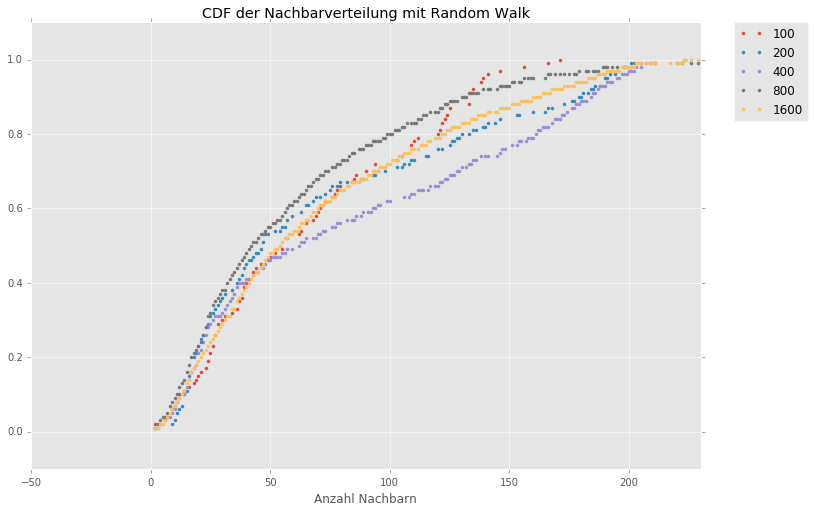

In [23]:
import random

def random_walk(graph, root, max_visits=10):
    """Generator der einen Graph anhand seiner Kanten mit Hilfe von
    random walk in iterativer Variante crawlt. Die Id des
    besuchten Knoten wird dabei geliefert.
    
    :param graph: Graph ueber den der random walk ausgefuehrt werden soll
    :param root: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    """
    visited = 0
    S = set()
    
    # die queue enthaelt im gegensatz zu den anderen implementierungen
    # den pfad, der im random walk gelaufen wurde
    Q = []
    Q.append(root)
    while Q and visited < max_visits:
        
        node = Q[-1]
        # print('{:>10s}: {:d}'.format('yield', node))
        yield node
        visited += 1
        if node not in S and visited < max_visits:
            S.add(node)
            
            # nachbarn die noch nicht besucht wurden
            neighbors = [n for n in nx.neighbors(graph, node) if n not in S]
            
            # sollten keine nachbarn vorhanden sein muessen die vorigen
            # knoten abgefragt werden (up[-1] ist der aktuelle knoten)
            up = -2
            
            # solange alle nachbarn des gewaehlten knotens besucht wurden
            # wird der knoten von der queue entfernt und neue nachbarn
            # gesucht
            while not neighbors:
                node = Q[up]
                neighbors = [n for n in nx.neighbors(graph, node) if n not in S]
                up -= 1
            
            # ansonsten waehle einen zufaelligen nachbar aus
            # und schiebe ihn auf die queue
            neighbor = random.choice(neighbors)
            Q.append(neighbor)
                

node_count = (100, 200, 400, 800, 1600)

data = []
for c in node_count:
    
    # ermittlung der anzahl an nachbarn fuer jeden dieser knoten
    count = [len(nx.neighbors(graph, node)) for node in random_walk(graph, 42, c)]
    data.append({
        'label': c,
        'neighbor_count': [i for i in count if i < border]
    })
    
plot_multi_ecdf([n['neighbor_count'] for n in data], 
                title='CDF der Nachbarverteilung mit Random Walk',
                xlabel='Anzahl Nachbarn',
                legend=[n['label'] for n in data])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 7.2 Angriffe auf unstrukturierte Overlays

In [24]:
numbers = [1, 10, 50, 100, 200, 500]

for i in range(5):
    print_heading('Test #%d' % (i + 1))
    for number in numbers:
        g = nx.MultiGraph()
        g.add_nodes_from(graph.nodes())
        g.add_edges_from(graph.edges())

        for _ in range(number + 1):
            node = random.choice(g.nodes())
            g.remove_node(node)

        print('{:3d} entfernt => {:2d} Komponenten'.format(number, nx.number_connected_components(g)))

 
Test #1
-------

  1 entfernt =>  1 Komponenten
 10 entfernt =>  1 Komponenten
 50 entfernt =>  1 Komponenten
100 entfernt => 11 Komponenten
200 entfernt =>  1 Komponenten
500 entfernt =>  1 Komponenten
 
Test #2
-------

  1 entfernt =>  1 Komponenten
 10 entfernt =>  1 Komponenten
 50 entfernt =>  1 Komponenten
100 entfernt =>  3 Komponenten
200 entfernt => 18 Komponenten
500 entfernt => 16 Komponenten
 
Test #3
-------

  1 entfernt =>  1 Komponenten
 10 entfernt =>  1 Komponenten
 50 entfernt =>  1 Komponenten
100 entfernt =>  1 Komponenten
200 entfernt =>  1 Komponenten
500 entfernt => 22 Komponenten
 
Test #4
-------

  1 entfernt =>  1 Komponenten
 10 entfernt =>  1 Komponenten
 50 entfernt =>  1 Komponenten
100 entfernt =>  1 Komponenten
200 entfernt => 11 Komponenten
500 entfernt =>  8 Komponenten
 
Test #5
-------

  1 entfernt =>  1 Komponenten
 10 entfernt => 11 Komponenten
 50 entfernt =>  1 Komponenten
100 entfernt => 11 Komponenten
200 entfernt => 23 Komponenten
500 en

In [25]:
import random

numbers = [1, 10, 50, 100, 200]
component_counts = {}
for n in numbers:
    component_counts[n] = []

print('arbeite', end='')
runs, steps, step = 50, 5, 0
for i in range(runs):
        
    for number in numbers:
        H = graph.copy()

        for _ in range(number + 1):
            node = random.choice(H.nodes())
            H.remove_node(node)
        component_counts[number].append(nx.number_connected_components(H))
        
    step += 1
    
    if step % steps == 0:
        print('..%d%%' % (step / runs * 100), end='')

print_heading('\nDurchschnittliche Anzahl an Komponenten')
for number in sorted(component_counts.keys()):
    print('# {:<3d} entfernt => {:8,.2f}'.format(number, np.average(component_counts[number])))

arbeite..10%..20%..30%..40%..50%..60%..70%..80%..90%..100% 

Durchschnittliche Anzahl an Komponenten
----------------------------------------

# 1   entfernt =>     1.16
# 10  entfernt =>     1.00
# 50  entfernt =>     1.58
# 100 entfernt =>     3.56
# 200 entfernt =>     4.34


### 7.3 Graphen-Metriken

In [26]:
G = nx.Graph()
G.add_nodes_from([i for i in range(1, 13)])
G.add_edges_from([
    (1, 2),
    (1, 3),
    (3, 4),
    (3, 8),
    (3, 11),
    (4, 5),
    (4, 6),
    (4, 7),
    (4, 8),
    (6, 11),
    (7, 8),
    (7, 11),
    (7, 10),
    (8, 9),
    (9, 10),
    (9, 12),
])

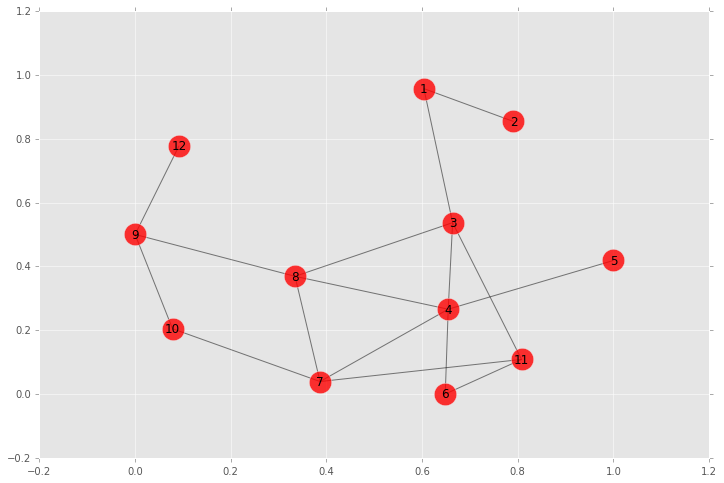

In [27]:
# positions for all nodes
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

#### 7.3.1 Globaler Cluster Koeffizient

Siehe [NetworkX API Doc](http://networkx.readthedocs.io/en/stable/reference/algorithms.clustering.html)

Wenn man den Clustering Koeffizienten eines einzelnen Knotens per Hand ausrechnen möchte benötigt man die Anzahl an Nachbarn des Knoten (Knotengrad) und die Anzahl der Verbindungen unter diesen Nachbarn $N_v$.

$CC(v)$:

$v$: Knoten

$K_v$: Knotengrad

$N_v$: Anzahl Verbindungen unter den Knoten von $v$

$CC(v) = \dfrac{2 N_v}{K_v(K_v - 1)}$

In [28]:
# Cluster coefficient fuer einzelne Knoten
nx.clustering(G)

{1: 0.0,
 2: 0.0,
 3: 0.16666666666666666,
 4: 0.2,
 5: 0.0,
 6: 0.0,
 7: 0.16666666666666666,
 8: 0.3333333333333333,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

Beispiel für den Knoten *3*.

4 Nachbarn: ``[1, 4, 8, 11]``

1 Verbindung: ``[(4, 8)]``

=> $\dfrac{2 * 1}{4 * 3} = \dfrac{2}{12} = \dfrac{1}{6} = 0.166$

Der globale Clustering Koeffizient ist lediglich der Durchschnitt aller lokalen Clustering Koeffizienten.

In [29]:
# Cluster coefficient fuer den Graph
nx.average_clustering(G)

0.07222222222222223

#### 7.3.2 Betweenness Centrality

Siehe [NetworkX API Doc](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)

Zur Berechnung der *Betweenness Centrality* eines einzelnen Knotens $v$, müssen zunächst alle kürzesten Pfade gefunden werden, die durch diesen Knoten $v$ verlaufen. 

1. Man bildet die Paare der kürzesten Pfade. 
2. Für jedes Paar $(s, t)$ werden die Anzahlen der kürzesten Pfade $\sigma_{(s, t)}$ zueinander gezählt. 
3. Davon werden die Anzahl der kürzesten Pfade, die durch den gewählten Knoten verlaufen $\sigma_{(s, t|v)}$ geteilt durch die Anzahl der kürzestens Pfade zwischen den Knoten = $betweenness_i$.

Den Ablauf *2.* und *3.* nimmt man für jedes in *1.* ermittelte Paar vor. Die Summe aus den einzelnen Ergebnissen aus *3.* bildet die *Betweenness Centrality* des Knotens $betweenness = \sum_{i = 0}^{n} betweenness_i$, wobei $n$ die Anzahl der Paare ist.

Siehe auch:

1. [8 -7 Betweenness centrality Part I](https://www.youtube.com/watch?v=6V_-xWvpMFk)
2. [8 - 8 Betweenness centrality Part II](https://www.youtube.com/watch?v=UNDWoKE9s1w)

In [30]:
nx.betweenness_centrality(G, normalized=False)

{1: 10.0,
 2: 0.0,
 3: 19.833333333333336,
 4: 17.25,
 5: 0.0,
 6: 0.6666666666666666,
 7: 9.25,
 8: 16.833333333333332,
 9: 11.25,
 10: 1.6666666666666665,
 11: 4.25,
 12: 0.0}

Im folgenden werden alle kürzesten Pfade gesammelt.

In [31]:
from collections import OrderedDict

def print_shortest_paths(paths):
    for start, end in paths:
        print('%d -- %d:' % (start, end))
        for path in paths[(start, end)]:
            print('  %s' % path)

paths = OrderedDict()

for start in G.nodes():
    for end in G.nodes():
        
        # der Graph ist bidirektional, daher muss nur in
        # eine Richtung geschaut werden (1 -> 4, 4 -> 1 unnoetig)
        if start < end:
            
            # Bilden eines Knotenpaares
            pair = (start, end)
            if pair not in paths:
                paths[pair] = []
            
            # hinzufuegen aller kuerzesten pfade zwischen start und end
            for path in nx.all_shortest_paths(G, start, end):
                paths[pair].append(path)

# ausgabe aller kuerzesten pfade im graph
print_shortest_paths(paths)

1 -- 2:
  [1, 2]
1 -- 3:
  [1, 3]
1 -- 4:
  [1, 3, 4]
1 -- 5:
  [1, 3, 4, 5]
1 -- 6:
  [1, 3, 11, 6]
  [1, 3, 4, 6]
1 -- 7:
  [1, 3, 8, 7]
  [1, 3, 11, 7]
  [1, 3, 4, 7]
1 -- 8:
  [1, 3, 8]
1 -- 9:
  [1, 3, 8, 9]
1 -- 10:
  [1, 3, 8, 9, 10]
  [1, 3, 8, 7, 10]
  [1, 3, 11, 7, 10]
  [1, 3, 4, 7, 10]
1 -- 11:
  [1, 3, 11]
1 -- 12:
  [1, 3, 8, 9, 12]
2 -- 3:
  [2, 1, 3]
2 -- 4:
  [2, 1, 3, 4]
2 -- 5:
  [2, 1, 3, 4, 5]
2 -- 6:
  [2, 1, 3, 11, 6]
  [2, 1, 3, 4, 6]
2 -- 7:
  [2, 1, 3, 8, 7]
  [2, 1, 3, 11, 7]
  [2, 1, 3, 4, 7]
2 -- 8:
  [2, 1, 3, 8]
2 -- 9:
  [2, 1, 3, 8, 9]
2 -- 10:
  [2, 1, 3, 8, 9, 10]
  [2, 1, 3, 8, 7, 10]
  [2, 1, 3, 11, 7, 10]
  [2, 1, 3, 4, 7, 10]
2 -- 11:
  [2, 1, 3, 11]
2 -- 12:
  [2, 1, 3, 8, 9, 12]
3 -- 4:
  [3, 4]
3 -- 5:
  [3, 4, 5]
3 -- 6:
  [3, 11, 6]
  [3, 4, 6]
3 -- 7:
  [3, 8, 7]
  [3, 11, 7]
  [3, 4, 7]
3 -- 8:
  [3, 8]
3 -- 9:
  [3, 8, 9]
3 -- 10:
  [3, 8, 9, 10]
  [3, 8, 7, 10]
  [3, 11, 7, 10]
  [3, 4, 7, 10]
3 -- 11:
  [3, 11]
3 -- 12:
  [3, 8, 9, 12]
4

##### Beispiel für Knoten 7

Kürzeste Pfade durch den Knoten:

In [32]:
def betweenness_relevants(paths, target):
    """Liefert die Paare inklusive Pfade die relevant 
    fuer die Berechnung der betweenness centrality sind.
    
    :param paths: dict and 2-Tupeln die Start und Ziel 
        bilden inklusive der Liste an kuerzesten Pfaden
    :param target: Objekt dessen betweenness centrality
        berechnet werden soll
    :return: gefilterte menge an pfaden
    """
    target_paths = paths.copy()
    for pair in paths:
        is_in = False
        targets = [p[1:len(p) - 1] for p in paths[pair]]
        for t in targets:
            if target in t:
                is_in = True
        if not is_in:
            del target_paths[pair]
    return target_paths

target = 7
targets = betweenness_relevants(paths, target)
print_shortest_paths(targets)

1 -- 10:
  [1, 3, 8, 9, 10]
  [1, 3, 8, 7, 10]
  [1, 3, 11, 7, 10]
  [1, 3, 4, 7, 10]
2 -- 10:
  [2, 1, 3, 8, 9, 10]
  [2, 1, 3, 8, 7, 10]
  [2, 1, 3, 11, 7, 10]
  [2, 1, 3, 4, 7, 10]
3 -- 10:
  [3, 8, 9, 10]
  [3, 8, 7, 10]
  [3, 11, 7, 10]
  [3, 4, 7, 10]
4 -- 10:
  [4, 7, 10]
4 -- 11:
  [4, 3, 11]
  [4, 6, 11]
  [4, 7, 11]
5 -- 10:
  [5, 4, 7, 10]
5 -- 11:
  [5, 4, 3, 11]
  [5, 4, 6, 11]
  [5, 4, 7, 11]
6 -- 10:
  [6, 11, 7, 10]
  [6, 4, 7, 10]
8 -- 10:
  [8, 9, 10]
  [8, 7, 10]
8 -- 11:
  [8, 3, 11]
  [8, 7, 11]
9 -- 11:
  [9, 8, 3, 11]
  [9, 8, 7, 11]
  [9, 10, 7, 11]
10 -- 11:
  [10, 7, 11]
11 -- 12:
  [11, 3, 8, 9, 12]
  [11, 7, 8, 9, 12]
  [11, 7, 10, 9, 12]


Ermittlung der einzelnen Summanden zur Betweenness centrality

In [33]:
def calc_betweenness_i(paths, target):
    """Berechnet die einzelnen Summanden zur Ermittlung
    der Betweenness centrality eines Knotens.
    
    :param paths: gefilterte Menge an Pfaden, die relevant
        sind zur Berechnung der Betweenness centrality
    """
    betweenness_i = []
    for pair in paths:
        denominator = len(paths[pair])
        nominator = sum([1 for p in paths[pair] if target in p])
        betweenness_i.append(nominator / denominator)
    return betweenness_i

betweenness_i = calc_betweenness_i(targets, target)
print(' + '.join(['{:.2f}'.format(i) for i in betweenness_i]))
print_heading('Betweenness centrality = {:.2f}'.format(sum(betweenness_i)))

0.75 + 0.75 + 0.75 + 1.00 + 0.33 + 1.00 + 0.33 + 1.00 + 0.50 + 0.50 + 0.67 + 1.00 + 0.67
 
Betweenness centrality = 9.25
-----------------------------



##### Beispiel für Knoten 8

Kürzeste Pfade durch den Knoten:

In [34]:
target = 8
targets = betweenness_relevants(paths, target)
print_shortest_paths(targets)

1 -- 7:
  [1, 3, 8, 7]
  [1, 3, 11, 7]
  [1, 3, 4, 7]
1 -- 9:
  [1, 3, 8, 9]
1 -- 10:
  [1, 3, 8, 9, 10]
  [1, 3, 8, 7, 10]
  [1, 3, 11, 7, 10]
  [1, 3, 4, 7, 10]
1 -- 12:
  [1, 3, 8, 9, 12]
2 -- 7:
  [2, 1, 3, 8, 7]
  [2, 1, 3, 11, 7]
  [2, 1, 3, 4, 7]
2 -- 9:
  [2, 1, 3, 8, 9]
2 -- 10:
  [2, 1, 3, 8, 9, 10]
  [2, 1, 3, 8, 7, 10]
  [2, 1, 3, 11, 7, 10]
  [2, 1, 3, 4, 7, 10]
2 -- 12:
  [2, 1, 3, 8, 9, 12]
3 -- 7:
  [3, 8, 7]
  [3, 11, 7]
  [3, 4, 7]
3 -- 9:
  [3, 8, 9]
3 -- 10:
  [3, 8, 9, 10]
  [3, 8, 7, 10]
  [3, 11, 7, 10]
  [3, 4, 7, 10]
3 -- 12:
  [3, 8, 9, 12]
4 -- 9:
  [4, 8, 9]
4 -- 12:
  [4, 8, 9, 12]
5 -- 9:
  [5, 4, 8, 9]
5 -- 12:
  [5, 4, 8, 9, 12]
6 -- 9:
  [6, 4, 8, 9]
6 -- 12:
  [6, 4, 8, 9, 12]
7 -- 9:
  [7, 8, 9]
  [7, 10, 9]
7 -- 12:
  [7, 8, 9, 12]
  [7, 10, 9, 12]
9 -- 11:
  [9, 8, 3, 11]
  [9, 8, 7, 11]
  [9, 10, 7, 11]
11 -- 12:
  [11, 3, 8, 9, 12]
  [11, 7, 8, 9, 12]
  [11, 7, 10, 9, 12]


In [35]:
betweenness_i = calc_betweenness_i(targets, target)
print(' + '.join(['{:.2f}'.format(i) for i in betweenness_i]))
print_heading('Betweenness centrality = {:.2f}'.format(sum(betweenness_i)))

0.33 + 1.00 + 0.50 + 1.00 + 0.33 + 1.00 + 0.50 + 1.00 + 0.33 + 1.00 + 0.50 + 1.00 + 1.00 + 1.00 + 1.00 + 1.00 + 1.00 + 1.00 + 0.50 + 0.50 + 0.67 + 0.67
 
Betweenness centrality = 16.83
------------------------------



##### Beispiel für Knoten 6

Kürzeste Pfade durch den Knoten:

In [36]:
target = 6
targets = betweenness_relevants(paths, target)
print_shortest_paths(targets)

4 -- 11:
  [4, 3, 11]
  [4, 6, 11]
  [4, 7, 11]
5 -- 11:
  [5, 4, 3, 11]
  [5, 4, 6, 11]
  [5, 4, 7, 11]


In [37]:
betweenness_i = calc_betweenness_i(targets, target)
print(' + '.join(['{:.2f}'.format(i) for i in betweenness_i]))
print_heading('Betweenness centrality = {:.2f}'.format(sum(betweenness_i)))

0.33 + 0.33
 
Betweenness centrality = 0.67
-----------------------------

